## <center> Portfolio Strategies </center>

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (16,9)

### Loading and manipulating data

In [141]:
data = pd.read_excel('https://www.oliviergueant.com/uploads/4/3/0/9/4309511/sbf120_as_of_end_2018.xlsx', sheet_name='Data')

#### Get the prices indexed by dates

In [139]:
price_df_list = []
for i in range(120):
    price_data = data.iloc[:,3*i:3*i+2].copy()
    price_data.dropna(inplace = True)
    price_data.iloc[:,0] =  pd.to_datetime(price_data.iloc[:,0], unit='D',origin = '1899-12-30',errors='coerce')
    price_data.rename(columns = {price_data.columns[0] : 'Date' , price_data.columns[1]: price_data.columns[0]}, inplace = True)
    price_data.set_index('Date',inplace=True)
    
    price_df_list.append(price_data)
    
agg_price_data = price_df_list[0]
for df in price_df_list[1:]:
    agg_price_data = agg_price_data.join(df, how='outer', sort='True')

In [106]:
prices_2019 = agg_price_data['2019-01-01':'2019-12-31']

In [107]:
prices_2019

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,23.80,85.90,47.76,199.60,71.44,10.25,132.62,27.9126,46.655,20.570,...,54.2785,16.89,74.38,12.07,141.20,97.0790,12.145,72.45,41.62,38.48
2019-01-03,24.60,83.30,46.72,197.20,71.20,10.15,133.30,28.0050,46.255,19.256,...,51.4050,17.07,73.66,12.12,138.95,94.0515,10.735,70.25,39.00,38.28
2019-01-04,24.08,86.05,47.96,200.00,72.58,10.71,138.12,28.5222,47.410,20.010,...,53.2954,16.50,77.86,12.43,141.10,98.1709,10.905,72.45,39.70,38.50
2019-01-07,24.80,85.85,48.66,197.45,72.22,10.81,137.32,29.0764,47.300,20.400,...,52.7359,17.48,78.16,12.44,138.65,97.0790,11.350,73.65,38.92,38.36
2019-01-08,25.76,87.80,49.38,198.65,73.14,11.00,141.66,29.5382,47.200,20.700,...,54.3087,19.05,80.82,12.78,138.70,98.9154,11.370,74.80,40.28,39.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,21.84,147.10,55.40,265.30,99.60,13.88,139.65,38.4237,49.355,29.600,...,75.1000,12.74,95.46,12.08,161.20,110.2000,24.230,112.60,64.25,44.16
2019-12-24,21.60,148.40,55.25,264.50,98.76,13.88,139.40,38.3498,49.475,29.660,...,75.8600,12.80,96.44,12.14,162.55,110.7000,24.280,112.00,63.80,44.26
2019-12-27,21.90,147.20,55.25,266.10,99.54,14.00,141.00,38.5530,49.290,29.490,...,74.7800,12.75,95.20,12.28,162.00,110.7000,24.340,113.50,63.70,44.70


#### Get the market capitalisation indexed by dates

In [108]:
df_mkt_cap_list = []
for i in range(120):
    mkt_cap_data = data.iloc[:, [3*i, 3*i+2]].copy()
    mkt_cap_data.dropna(inplace=True)
    mkt_cap_data.iloc[:,0] = pd.to_datetime(mkt_cap_data.iloc[:,0], unit='D', origin= '1899-12-30', errors='coerce')
    mkt_cap_data.rename(columns = {mkt_cap_data.columns[0] : 'Date', mkt_cap_data.columns[1]:mkt_cap_data.columns[0]}, inplace=True)
    mkt_cap_data.set_index('Date', inplace=True)
    df_mkt_cap_list.append(mkt_cap_data)
    
agg_mkt_cap_data = df_mkt_cap_list[0]
for df in df_mkt_cap_list[1:]:
    agg_mkt_cap_data = agg_mkt_cap_data.join(df, how='outer', sort='True')

In [109]:
caps_2019 = agg_mkt_cap_data['2019-01-01':'2019-12-31']

In [110]:
caps_2019

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,822.5973,7918.2783,4628.8745,111846.9327,42684.6422,4142.0623,18334.4915,2477.3276,125277.1991,27020.8901,...,7672.1492,764.1356,5695.3876,1111.0335,37477.5288,4982.8892,11065.9398,2451.0167,7597.9356,2159.8718
2019-01-03,850.2476,7678.6098,4528.0783,110502.0798,42543.1381,4101.6519,18428.5004,2485.5252,124203.1261,25294.8109,...,7265.9892,772.2791,5640.2561,1115.6359,36880.3302,4827.4923,9781.2156,2376.5897,7119.6418,2148.6458
2019-01-04,832.2749,7932.1053,4648.2584,112071.0748,43367.7101,4327.9500,19100.4216,2531.4320,127304.5121,26285.2704,...,7533.1998,746.4913,5961.8564,1144.1712,37450.9866,5038.9339,9936.1660,2451.0167,7247.4302,2160.9944
2019-01-07,857.1602,7913.6693,4716.1021,110642.1686,43152.6044,4368.3603,18989.7907,2580.6179,127009.1420,26797.5770,...,7454.1054,790.8283,5984.8278,1145.0917,36800.7037,4982.8892,10341.6308,2491.6132,7105.0374,2153.1362
2019-01-08,890.3406,8093.4207,4785.8841,111314.5950,43702.3191,4445.1400,19589.9632,2621.6061,126740.6237,27191.6590,...,7676.4246,861.8581,6188.5080,1176.3884,36813.9748,5077.1463,10359.8540,2530.5183,7353.3121,2231.7178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,754.8540,13559.7059,5545.0870,148061.1088,60281.6738,5608.9585,19324.5722,3441.4960,128415.8405,39062.0828,...,8202.0400,576.3817,7314.5480,1111.9540,42785.9606,5526.5065,22077.9374,3845.9847,11740.5732,2478.6886
2019-12-24,746.5589,13679.5402,5530.0733,147614.6373,59773.2742,5608.9585,19289.9775,3434.8778,128728.0662,39141.2627,...,8285.0434,579.0962,7389.6398,1117.4769,43144.2798,5551.5814,22123.4965,3825.4910,11658.3435,2484.3016
2019-12-27,756.9278,13568.9240,5530.0733,148507.5803,60245.3596,5657.4510,19511.3833,3453.0780,128246.7182,38916.9197,...,8167.0913,576.8341,7294.6257,1130.3638,42998.2979,5551.5814,22178.1674,3876.7253,11640.0703,2508.9987


#### Getting the universe of stocks

In [111]:
caps = agg_mkt_cap_data.loc['2018-12-31']
caps = caps.sort_values(ascending=False)
caps = caps[:10]

In [112]:
caps

MC FP Equity     130414.5455
TTE FP Equity    124001.7374
OR FP Equity     112743.5012
SAN FP Equity     94825.2974
AIR FP Equity     65183.8473
KER FP Equity     51976.5689
RMS FP Equity     51180.0509
BNP FP Equity     49335.7982
EL FP Equity      47106.2711
AI FP Equity      46453.6329
Name: 2018-12-31 00:00:00, dtype: float64

In [113]:
stocks = list(caps.index)
stocks

['MC FP Equity',
 'TTE FP Equity',
 'OR FP Equity',
 'SAN FP Equity',
 'AIR FP Equity',
 'KER FP Equity',
 'RMS FP Equity',
 'BNP FP Equity',
 'EL FP Equity',
 'AI FP Equity']

#### Aggregating data

In [114]:
prices_2019 = prices_2019[stocks]

In [115]:
prices_2019.head()

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-02,253.30,46.655,199.60,75.40,84.17,402.8,477.6,39.085,110.70,96.4545
2019-01-03,243.65,46.255,197.20,74.66,81.21,380.7,464.0,38.855,109.65,94.6818
2019-01-04,251.15,47.410,200.00,75.34,85.12,397.4,477.8,40.740,110.80,97.3182
2019-01-07,250.70,47.300,197.45,73.84,83.56,396.4,472.2,40.680,110.60,96.7727
2019-01-08,258.55,47.200,198.65,74.42,86.65,410.5,479.9,40.885,111.20,96.9091


In [116]:
caps_2019 = caps_2019[stocks]

In [117]:
caps_2019.head()

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-02,127939.5987,125277.1991,111846.9327,94499.4372,65346.8845,50865.3109,50419.9512,48848.3768,47212.8947,45447.0304
2019-01-03,123065.4687,124203.1261,110502.0798,93571.9892,63048.8356,48074.5379,48984.2072,48560.9231,46765.0759,44611.7645
2019-01-04,126853.6526,127304.5121,112071.0748,94424.2387,66084.4340,50183.4026,50441.0651,50916.7934,47255.5441,45853.9548
2019-01-07,126626.3616,127009.1420,110642.1686,92544.2765,64873.3001,50057.1232,49849.8763,50841.8055,47170.2452,45596.9499
2019-01-08,130591.5100,126740.6237,111314.5950,93271.1952,67272.2769,51837.6617,50662.7608,51098.0142,47426.1417,45661.2011


#### Building returns 

In [118]:
returns = prices_2019.pct_change().copy()

In [119]:
returns.head()

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.038097,-0.008574,-0.012024,-0.009814,-0.035167,-0.054866,-0.028476,-0.005885,-0.009485,-0.018379
2019-01-04,0.030782,0.024970,0.014199,0.009108,0.048147,0.043867,0.029741,0.048514,0.010488,0.027845
2019-01-07,-0.001792,-0.002320,-0.012750,-0.019910,-0.018327,-0.002516,-0.011720,-0.001473,-0.001805,-0.005605
2019-01-08,0.031312,-0.002114,0.006077,0.007855,0.036979,0.035570,0.016307,0.005039,0.005425,0.001409


### <center> Equally-weighted portfolio </center>

$d = 10$ assets, so $\theta_t = \frac{1}{d}$

In [146]:
nbStocks = 10
weights = [1/nbStocks for i in range(nbStocks)]
weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

$R_t^{Portfolio} = \theta_t^T * R_t$

In [147]:
strat_ret_EWP = returns.dot(weights)

#### Calculating PnL with an initial wealth of 100 euros

In [148]:
strat_ret_EWP.iloc[0] = 0.
PnL_EWP = (100.*(1.+strat_ret_EWP).cumprod())

### <center> Markowitz minimum-variance portfolio </center>

First, compute the covariance matrix over 2017-18

In [123]:
prices_2017_2018 = agg_price_data['2017-01-01':'2018-12-31']
prices_2017_2018 = prices_2017_2018[stocks]
returns_2017_2018 = prices_2017_2018.pct_change().copy()
mat_cov = returns_2017_2018.cov()*252

In [124]:
mat_cov

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
MC FP Equity,0.047162,0.015306,0.020658,0.010875,0.025698,0.044543,0.021893,0.016409,0.016013,0.020009
TTE FP Equity,0.015306,0.026549,0.009076,0.009026,0.014892,0.012928,0.006781,0.015233,0.007375,0.012896
OR FP Equity,0.020658,0.009076,0.027092,0.011394,0.015027,0.021291,0.012527,0.007779,0.012267,0.013257
SAN FP Equity,0.010875,0.009026,0.011394,0.026761,0.011065,0.008007,0.005359,0.009793,0.008614,0.011293
AIR FP Equity,0.025698,0.014892,0.015027,0.011065,0.057191,0.027674,0.013434,0.019044,0.014096,0.021067
KER FP Equity,0.044543,0.012928,0.021291,0.008007,0.027674,0.076547,0.025523,0.013210,0.014898,0.021216
RMS FP Equity,0.021893,0.006781,0.012527,0.005359,0.013434,0.025523,0.026921,0.006409,0.008936,0.009744
BNP FP Equity,0.016409,0.015233,0.007779,0.009793,0.019044,0.013210,0.006409,0.042631,0.008293,0.015052
EL FP Equity,0.016013,0.007375,0.012267,0.008614,0.014096,0.014898,0.008936,0.008293,0.036092,0.011009
AI FP Equity,0.020009,0.012896,0.013257,0.011293,0.021067,0.021216,0.009744,0.015052,0.011009,0.025920


#### Calculating the optimum theta

#### <center>$\theta_{MV}^* = \frac{\sum^{-1}e}{e^T\sum^{-1}e}$ </center>

In [125]:
e = np.ones(10)
theta = (e@np.linalg.inv(mat_cov))/(e.T@np.linalg.inv(mat_cov)@e)
theta

array([-0.1924959 ,  0.21311102,  0.13404994,  0.19229556, -0.02474039,
       -0.0128246 ,  0.33844716,  0.09095618,  0.13964517,  0.12155585])

In [126]:
portfolio_variance = theta.T@mat_cov@theta
portfolio_variance

0.01140731662532327

#### Conmputing the returns over 2019

In [127]:
strat_ret_MMV = returns@theta.T

In [128]:
strat_ret_MMV.iloc[0] = 0.
PnL_MMV = (100.*(1.+strat_ret_MMV).cumprod())

### <center>ERC portfolio </center>

In [150]:
from __future__ import division
from matplotlib import pyplot as plt
from numpy.linalg import inv,pinv
from scipy.optimize import minimize

 # risk budgeting optimization
def calculate_portfolio_var(w,V):
    # function that calculates portfolio risk
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

def calculate_risk_contribution(w,V):
    # function that calculates asset contribution to total risk
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    # Marginal Risk Contribution
    MRC = V*w.T
    # Risk Contribution
    RC = np.multiply(MRC,w.T)/sigma
    return RC

def risk_budget_objective(x,pars):
    # calculate portfolio risk
    V = pars[0]# covariance table
    x_t = pars[1] # risk target in percent of portfolio risk
    sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = sum(np.square(asset_RC-risk_target.T))[0,0]*10000 # sum of squared error
    return J

def total_weight_constraint(x):
    return np.sum(x)-1.0

def long_only_constraint(x):
    return x

x_t = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] # your risk budget percent of total portfolio risk (equal risk)

if type(mat_cov) is not np.ndarray:
    mat_cov = mat_cov.to_numpy()
    
cons = ({'type': 'eq', 'fun': total_weight_constraint},
{'type': 'ineq', 'fun': long_only_constraint})
res= minimize(risk_budget_objective, x_t, args=[mat_cov,x_t], method='SLSQP',constraints=cons, options={'disp': True, 'ftol': 1e-30})
theta = np.asmatrix(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.5201641441781802e-14
            Iterations: 19
            Function evaluations: 261
            Gradient evaluations: 19


#### Risk contribution

In [151]:
portfolio_variance = (theta@mat_cov@theta.T)
sigma = np.sqrt(portfolio_variance)
marginal_risk = mat_cov@theta.T
risk_contribution = np.multiply(marginal_risk, sigma.T)/sigma
print(risk_contribution)

[[0.02167898]
 [0.0128248 ]
 [0.01440462]
 [0.01164055]
 [0.02000162]
 [0.02324945]
 [0.01288241]
 [0.01492688]
 [0.01353949]
 [0.01532253]]


#### Conmputing the returns over 2019

In [131]:
strat_ret_ERC = returns@theta.T

In [144]:
strat_ret_ERC.iloc[0] = 0.
PnL_ERC = (100.*(1.+strat_ret_ERC).cumprod())

## <center> Results </center>

### <center> Ratios </center>

In [133]:
def sharpe_ratio(returns):
    return np.mean(returns)*np.sqrt(252)/np.std(returns)

def mdd_2(returns):
    pnl = np.c_[np.array([100.]), 100.*np.cumprod(1.+returns.to_numpy()).reshape((1,-1))].flatten()
    return np.max(1. - pnl/np.maximum.accumulate(pnl))

In [134]:
print('Sharpe ratio \n', 'Equally-weighted portfolio : ', sharpe_ratio(strat_ret_EWP[1:]),
                         '\n Markowitz minimum-variance portfolio : ', sharpe_ratio(strat_ret_MMV[1:]),
                         '\n ERC portfolio : ', sharpe_ratio(strat_ret_ERC[1:]))

Sharpe ratio 
 Equally-weighted portfolio :  2.18592836404037 
 Markowitz minimum-variance portfolio :  1.5169503032680018 
 ERC portfolio :  0    2.121764
dtype: float64


In [135]:
print('MDD \n', 'Equally-weighted portfolio : ', mdd_2(strat_ret_EWP[1:]),
                         '\n Markowitz minimum-variance portfolio : ', mdd_2(strat_ret_MMV[1:]),
                         '\n ERC portfolio : ', mdd_2(strat_ret_ERC[1:]))

MDD 
 Equally-weighted portfolio :  0.0719127029565988 
 Markowitz minimum-variance portfolio :  0.06339546688965136 
 ERC portfolio :  0.06718390155333342


### <center> PnL </center>

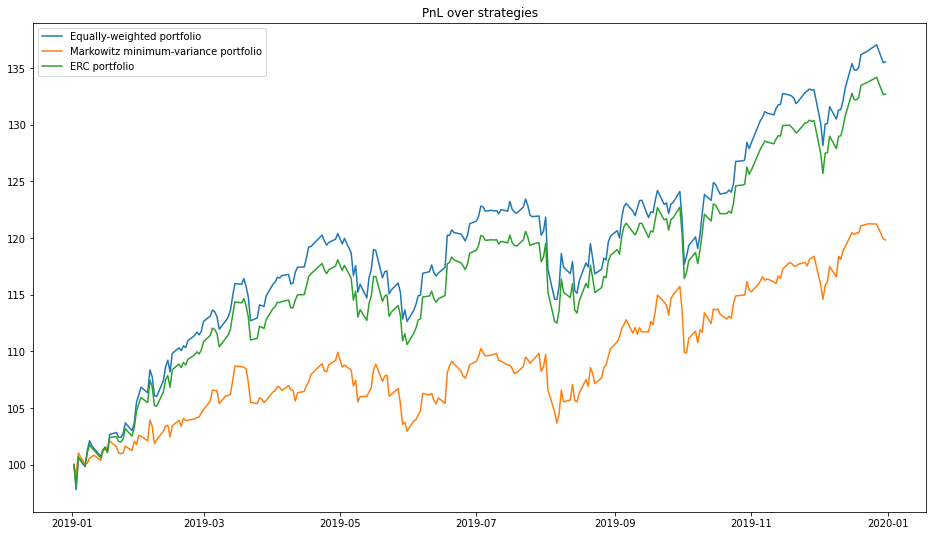

In [145]:
plt.plot(PnL_EWP, label = "Equally-weighted portfolio")
plt.plot(PnL_MMV, label = "Markowitz minimum-variance portfolio")
plt.plot(PnL_ERC, label = "ERC portfolio")
plt.title('PnL over strategies')
plt.legend(loc='best')
plt.show()